# Eigenanalysis in 2-dimensions (orthogonal least squares regression)
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/eigenanalysis_2dim.ipynb)

Demonstration of how eigenanalysis in 2-dimensions (say, the x-y plane) leads to finding the orthongal least squares best fit line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats
import numpy.linalg as LA

import matplotlib as mpl
# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 12.0/2)

# specify whether running on Colab or locally
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
print('IN_COLAB = ' + str(IN_COLAB))

IN_COLAB = False


Let's start first by defining some constants to make my life easier later on.

In [2]:
mult_fact = 12
FS = 10
inc = .2
MS = 12

Next, we are going to make-up two data points (two dimensions) in x-y space and store them in a matrix called A. Let's plot them too to see what they look like

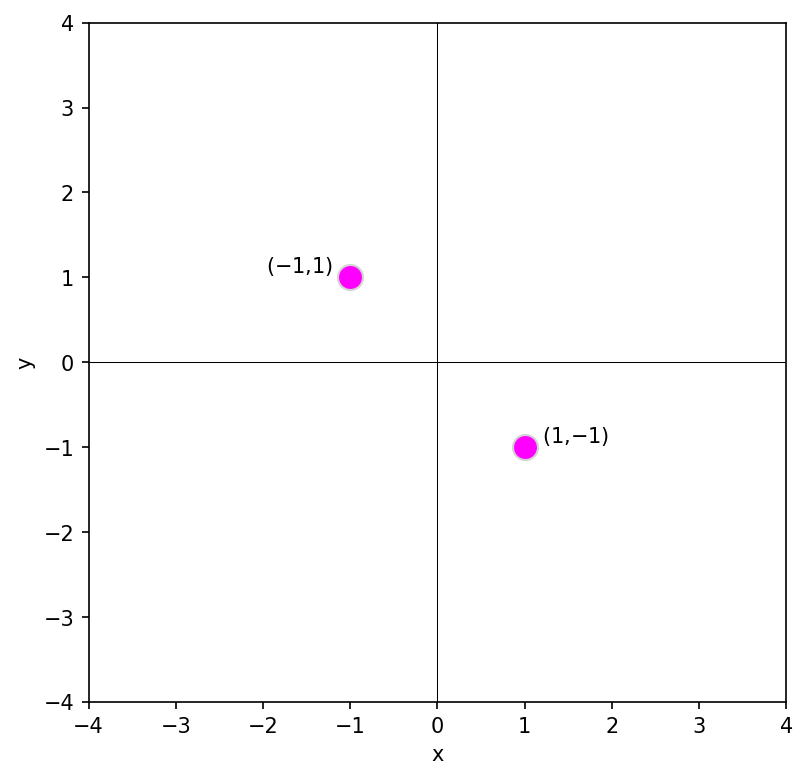

In [3]:
A = [[-1, 1],[1, -1]]

plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-1$,$1$)", color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($1$,$-1$)", color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.axhline(y=0, color = 'black', linewidth = 0.5)
plt.axvline(x=0, color = 'black', linewidth = 0.5)

plt.xlabel('x')
plt.ylabel('y')    

plt.show()

Ok - all well and good. My guess is that your brain could easily fit a line through these points, right? In fact, for these two points, the line would perfectly intersect both pink points and we could talk about their position along this new line.

Let's do this using eigenanalysis (which will find the orthogonal best fit line for us).

In [4]:
C = np.cov(A, rowvar = 0, bias=True)
LAM, E = LA.eig(C)
A_new = np.dot(A,E) #new coordinates of the pink points using our new "basis"
print(A_new)

[[-1.41421356  0.        ]
 [ 1.41421356  0.        ]]


Notice that the _new_ coordinates are now 
$(-\sqrt{2},0)$ and $(\sqrt{2},0)$. 
Let's plot these results.

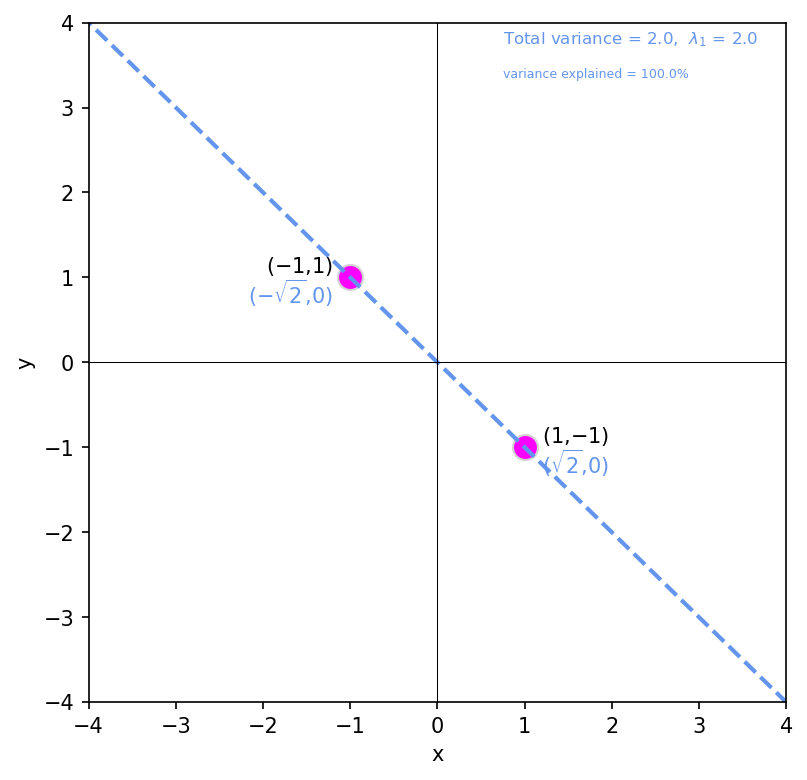

In [5]:
plt.figure()
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-1$,$1$)", color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-\sqrt{2}$,$0$)", color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'right', verticalalignment = 'top')

plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($1$,$-1$)", color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($\sqrt{2}$,$0$)", color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left', verticalalignment = 'top')

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.75,'Total variance = ' + str(np.sum(LAM)) + ',  $\lambda_1$ = ' + str(LAM[0]), color = 'cornflowerblue', fontsize = FS*.8)

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.35,'variance explained = ' + str(var_exp) + '%', color = 'cornflowerblue', fontsize = FS*.6)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.xlabel('x')
plt.ylabel('y')    

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')

plt.axhline(y=0, color = 'black', linewidth = 0.5)
plt.axvline(x=0, color = 'black', linewidth = 0.5)

plt.show()

OK - the black coordinates are the original coordinates of our pink points. The light blue are the coordinates along the new axis (dashed blue line). In the upper-right-hand corner we see how much variance of our data is explained by our light blue line - namely, all of it.

Next - if we find the line _orthogonal_ to the best-fit blue line, then we would have a new $\mathbf{R}^2$ basis to describe _any_ point in our x-y space. This orthogonal line is output by the eigenanalysis and plotted in orange below.

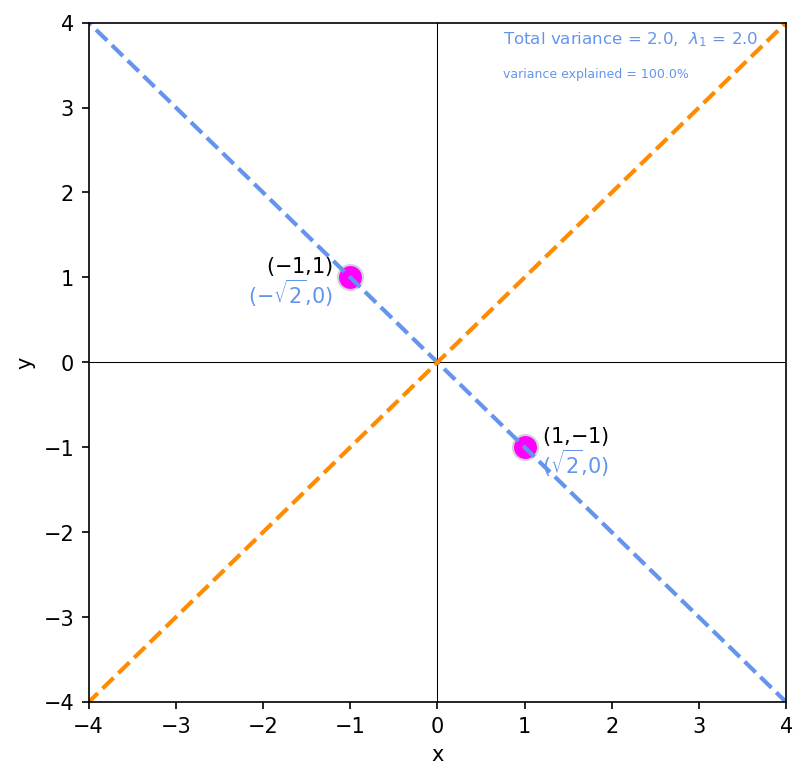

In [6]:
plt.figure()
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-1$,$1$)", color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], r"($-\sqrt{2}$,$0$)", color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'right', verticalalignment = 'top')

plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($1$,$-1$)", color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], r"($\sqrt{2}$,$0$)", color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left', verticalalignment = 'top')

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.75,'Total variance = ' + str(np.sum(LAM)) + ',  $\lambda_1$ = ' + str(LAM[0]), color = 'cornflowerblue', fontsize = FS*.8)

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.35,'variance explained = ' + str(var_exp) + '%', color = 'cornflowerblue', fontsize = FS*.6)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.xlabel('x')
plt.ylabel('y')    

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')

plt.axhline(y=0, color = 'black', linewidth = 0.5)
plt.axvline(x=0, color = 'black', linewidth = 0.5)

plt.plot([E[1,1]*-mult_fact, E[1,1]*mult_fact],[E[-1,-1]*-mult_fact, E[-1,-1]*mult_fact],linestyle = '--', linewidth = 2, color = 'darkorange')

plt.show()

Ok - the above data was pretty simple - with the two points lying perfectly along a line. How about if we have more points that do not perfectly fall alone a single axis? Let's repeat our analysis again below for the following 3 points.

# Breakout Groups - a more complex example

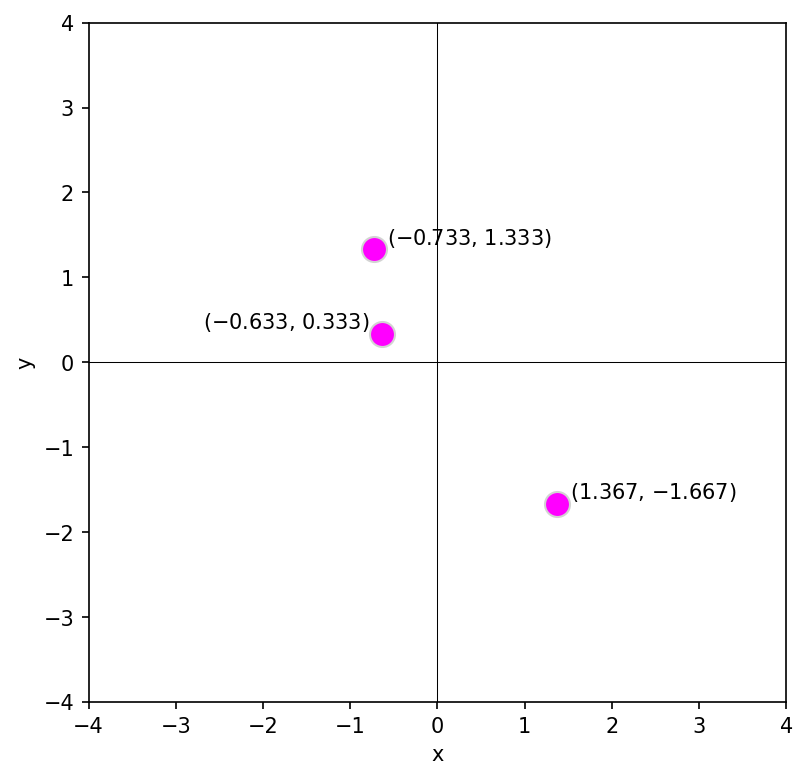

In [7]:
#==========================
# MODIFY THESE POINTS
# feel free to add more (x,y) points as well
# we will be subtracting the mean in the next few lines
A = [(-1, 1),
     (1, -1),
     (-1.1, 2),
    ]
#--------------------------
A = np.asarray(A)           # keep this line - just makes it a numpy array
A = A - np.mean(A,axis=0)   # subtract the mean so everything is an anomaly
A = np.around(A,3)          # round the points to make them more readable
#==========================

inc = .15

plt.figure()
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

txt_str = r"($" + str(list(list(zip(*A)))[0][0]) + r"$, $" + str(list(list(zip(*A)))[1][0]) + r"$)"
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')

txt_str = r"($" + str(list(zip(*A))[0][1]) + r"$, $" + str(list(list(zip(*A)))[1][1]) + r"$)"
plt.text(list(zip(*A))[0][1]+inc, list(list(zip(*A)))[1][1], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

txt_str = r"($" + str(list(list(zip(*A)))[0][2]) + r"$, $" + str(list(list(zip(*A)))[1][2]) + r"$)"
plt.text(list(zip(*A))[0][2]+inc, list(zip(*A))[1][2], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')


plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('x')
plt.ylabel('y')    

plt.axhline(y=0, color = 'black', linewidth = 0.5)
plt.axvline(x=0, color = 'black', linewidth = 0.5)

plt.show()

Once again, let's find the orthogonal best fit line and the line orthogonal to that - together, these two lines will form a basis for $R^2$ and we can use this new basis to define the "coordinates" of our data points. In other words, we can re-write our data matrix "A" in _new_ units ("A_new") that use our new basis functions. Don't worry - we'll plot it to see what is actually going on.

In [8]:
C = np.cov(A, rowvar = False,bias=True)  # covariance matrix of A
LAM, E = LA.eig(C)
E[:,[0,1]] = E[:,[1,0]]
E[:,1] *=-1
A_new = np.dot(A,E)

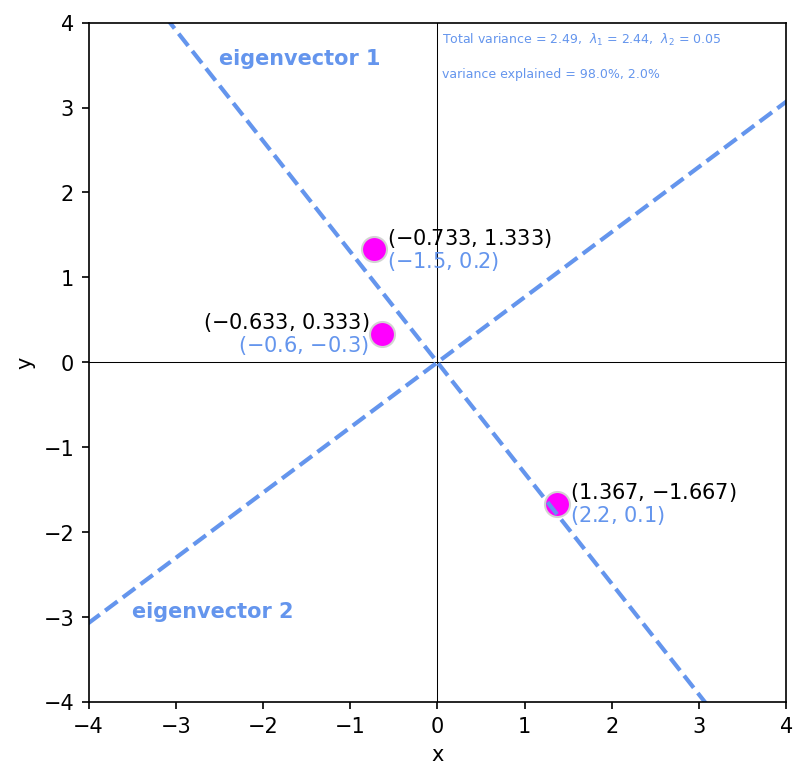

In [9]:
plt.figure()
plt.plot(list(zip(*A))[0],list(zip(*A))[1], marker = 'o', linestyle = '', markersize = MS, color = 'fuchsia',markeredgecolor = 'lightgray')

txt_str = r"($" + str(list(list(zip(*A)))[0][0]) + r"$, $" + str(list(list(zip(*A)))[1][0]) + r"$)"
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')

txt_str = r"($" + str(list(zip(*A))[0][1]) + r"$, $" + str(list(list(zip(*A)))[1][1]) + r"$)"
plt.text(list(zip(*A))[0][1]+inc, list(list(zip(*A)))[1][1], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

txt_str = r"($" + str(list(list(zip(*A)))[0][2]) + r"$, $" + str(list(list(zip(*A)))[1][2]) + r"$)"
plt.text(list(zip(*A))[0][2]+inc, list(zip(*A))[1][2], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')


plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel('x')
plt.ylabel('y')    

plt.axhline(y=0, color = 'black', linewidth = 0.5)
plt.axvline(x=0, color = 'black', linewidth = 0.5)

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')
plt.plot([E[0,1]*-mult_fact, E[0,1]*mult_fact],[E[-1,1]*-mult_fact, E[-1,1]*mult_fact],linestyle = '--', linewidth = 2, color = 'cornflowerblue')

txt_str = r"($" + str(round(list(zip(*A_new))[0][0],1)) + r"$, $" + str(round(list(zip(*A_new))[1][0],1)) + r"$)"
plt.text(list(zip(*A))[0][0]-inc, list(zip(*A))[1][0], txt_str, color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'top')

txt_str = r"($" + str(round(list(zip(*A_new))[0][1],1)) + r"$, $" + str(round(list(zip(*A_new))[1][1],1)) + r"$)"
plt.text(list(zip(*A))[0][1]+inc, list(zip(*A))[1][1], txt_str, color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'top')

txt_str = r"($" + str(round(list(zip(*A_new))[0][2],1)) + r"$, $" + str(round(list(zip(*A_new))[1][2],1)) + r"$)"
plt.text(list(zip(*A))[0][2]+inc, list(zip(*A))[1][2], txt_str, color = 'cornflowerblue', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'top')


plt.text(.05,3.75,'Total variance = ' + str(np.around(np.sum(LAM),2)) + ',  $\lambda_1$ = ' + str(np.around(LAM[1],2))+ ',  $\lambda_2$ = ' + str(np.around(LAM[0],2)), color = 'cornflowerblue', fontsize = FS*.6)

var_exp = 100.*LAM[0]/np.sum(LAM)
var_exp2 = 100.*LAM[1]/np.sum(LAM)
plt.text(.05,3.35,'variance explained = ' + str(np.around(var_exp2,1)) + '%, ' + str(np.around(var_exp,1)) + '%', color = 'cornflowerblue', fontsize = FS*.6)


plt.text(-3.5, -3, "eigenvector 2", color = 'cornflowerblue', fontsize = FS, fontweight = 'bold')   
plt.text(-2.5, 3.5, "eigenvector 1", color = 'cornflowerblue', fontsize = FS, fontweight = 'bold')      

plt.show()


Notice how each point still has a coordinate in this new eigenvector space, but that the _first coordinate_ (associated with eigenvector 1) is the most important in explaining the differences between points. The second coordinate explains the rest.